In [2]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
df_train = pd.read_csv('../../hp/Downloads/titanic/train.csv')
df_test = pd.read_csv('../../hp/Downloads/titanic/test.csv')

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
selected_cols = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']

In [20]:
df_train[selected_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [21]:
df_test[selected_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Fare    417 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [22]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [23]:
df_train['Fare'].fillna(df_train['Fare'].mean(), inplace=True)
df_test['Fare'].fillna(df_train['Fare'].mean(), inplace=True)

In [24]:
df_train[selected_cols].isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Fare      0
dtype: int64

In [25]:
df_test[selected_cols].isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Fare      0
dtype: int64

In [26]:
df_train['Sex']=df_train['Sex'].map({'male':0,'female':1})
df_test['Sex']=df_test['Sex'].map({'male':0,'female':1})

In [27]:
df_train[selected_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [28]:
df_test[selected_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Fare    418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [29]:
X = df_train[selected_cols]
y = df_train['Survived']

In [30]:
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=.25,random_state=100)

In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [32]:
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_lin = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_rbf = SVC(kernel='rbf')
model_rf = RandomForestClassifier(n_estimators=10, random_state=1)

In [33]:
models = {'LR':model_LR,'KNN':model_KNN,'SVM_Lin':model_lin,'SVM_Poly':model_poly,
          'SVM_RBF':model_rbf, 'RF':model_rf}

for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    print(name,round(model.score(X_train_scaled,y_train),3), round(model.score(X_val_scaled,y_val),3))

LR 0.804 0.776
KNN 0.852 0.803
SVM_Lin 0.79 0.776
SVM_Poly 0.822 0.789
SVM_RBF 0.823 0.789
RF 0.97 0.798


In [34]:
params = {'n_estimators':[10,20,30,40], 'max_depth':[2,3,4,5],'min_samples_leaf':[2,3,4,5]}
grid_cv = GridSearchCV(RandomForestClassifier(),param_grid=params, cv=5, n_jobs=-1)

In [35]:
grid_cv.fit(df_train[selected_cols],df_train['Survived'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [36]:
model_final = grid_cv.best_estimator_
model_final.fit(df_train[selected_cols],df_train['Survived'])

RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=10)

In [37]:
sb.set()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

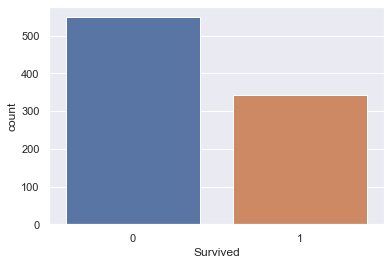

In [38]:
sb.countplot('Survived',data=df_train)

In [39]:
df_train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

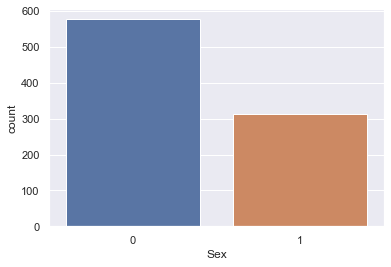

In [40]:
sb.countplot('Sex',data=df_train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

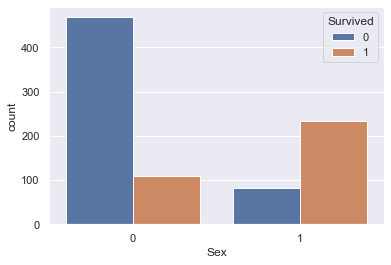

In [41]:
sb.countplot('Sex',hue='Survived', data=df_train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

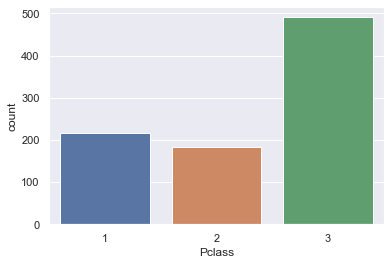

In [42]:
sb.countplot('Pclass',data=df_train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

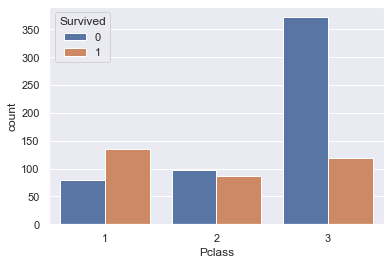

In [43]:
sb.countplot('Pclass',hue='Survived', data=df_train)

In [44]:
df_train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [45]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
df_train.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [49]:
y_pre = model_final.predict(df_test[selected_cols])

In [50]:
df_submit = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':y_pre})

In [51]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
df_submit.to_csv('submit1.csv', index=False)